# Assignment 5

## Assignment 5.1

Given are the following points A(−0.5;1), B(−1;−1.5), C(−1.5;1.5), D(1.5;−0.5) and E(0.5;−0.5) as shown below. The goal is to learn a decision function $f$ using Linear Learning Machines (LLM) that separates A and E from the other points.

<img src="5_figure.png" width="400">

a) Compute the kernel matrix for $K(x_1, x_2) = \langle x_1, x_2  \rangle ^2 $.

In [30]:
import numpy as np
K = (np.arange(-3, 4, 1)*np.arange(-3, 4, 1)[:, np.newaxis])**2
K

array([[81, 36,  9,  0,  9, 36, 81],
       [36, 16,  4,  0,  4, 16, 36],
       [ 9,  4,  1,  0,  1,  4,  9],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 9,  4,  1,  0,  1,  4,  9],
       [36, 16,  4,  0,  4, 16, 36],
       [81, 36,  9,  0,  9, 36, 81]])

b) Apply the perceptron update rule in dual representation (see below) to all five
data points using the kernel from (a). Start with α = $\vec{0}$, $b = 0$ and repeat the
updating until all data points can be correctly classified:

$$
\forall i : y_i \left( \sum_{j=1}^n \alpha_j y_j \langle x_1, x_2  \rangle ^2 + b \right) \leq 0  \Rightarrow \alpha_i = \alpha_i + 1; b = y_i (\underset{j}{\max} || x_j ||)^2
$$

In [109]:
A = [-0.5, 1, 1]; B = [-1, -1.5, -1]; C = [-1.5, 1.5, -1]; D = [1.5, -0.5, -1]; E = [0.5, -0.5, 1]
data_points = [A, B, C, D, E]

# Get all dot products to the 2nd power 
kernel = []
for instance in data_points:
    kernel.append(np.dot(instance[0], instance[1])**2)

# Create a flag
miss_class = True 

# Initialise the vector of true class labels (circles are 1s, crosses are 0s)
class_vec = np.array([1, -1, -1, -1, 1])

# Initialise the Lagrangian multiplier vector
lagrange_vec = np.array([0]*5)

# Initialise b
b = 0

# Repeat until we classify all points correctly  
while miss_class:

    # dummy 
    miss_class = False

    # Apply the perceptron training rule
    
    # Iterate over the training points (i index)
    for count_i, data_point_i in enumerate(data_points):

        running_total = 0
        for count_j, data_point_j in enumerate(data_points):
            running_total += lagrange_vec[count_j] * class_vec[count_j] * (np.dot(data_point_i[0], data_point_j[0]))**2

        running_total += b 
        running_total *= class_vec[count_i]
        
        # Check classification accuracy 
        
        # If we misclassify, update the b and the alpha 
        if running_total <= 0:
            
            # Update alpha (the Lagrange multiplier) associated with the point in question 
            lagrange_vec[count_i] += 1 
            print(f"Lagrange is updated to {lagrange_vec[count_i]}")

            # Update bias 
            b = np.max(np.array(np.abs(data_point_i[0:2])))**2 * data_point_i[-1]
            print(f"b is updated to {b}")

            miss_class = True
        else:
            pass
            print("correct classification!")


Lagrange is updated to 1
b is updated to 1.0
Lagrange is updated to 1
b is updated to -2.25
correct classification!
correct classification!
Lagrange is updated to 1
b is updated to 0.25
correct classification!
correct classification!
correct classification!
correct classification!
correct classification!


In [119]:
lagrange_vec*class_vec*np.dot(np.array(data_points)[:, 0], x)

ValueError: shapes (5,) and (12,) not aligned: 5 (dim 0) != 12 (dim 0)

In [140]:
np.sum(lagrange_vec*class_vec*(np.dot(np.array(data_points)[:, 0], x))**2)

-3.125

In [137]:
y = []
for x in np.arange(-3, 3, 0.5):
    y.append(np.sum(lagrange_vec*class_vec*(np.dot(np.array(data_points)[:, 0], x))**2) + b)

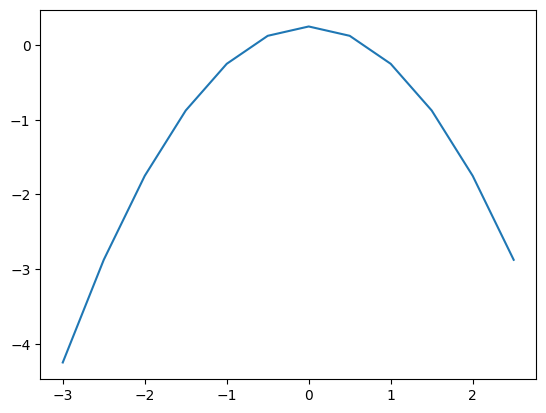

In [138]:
import matplotlib.pyplot as plt
plt.plot(np.arange(-3, 3, 0.5), y)

c) Classify the point X(-1;0) using the learned hyperplane.

array([-0.5, -1. , -1.5,  1.5,  0.5])

## Assignment 5.2

What is the main idea behind linear Support Vector Machines (SVMs)? Illustrate your
explanation by drawing a figure. What equations are used in SVMs? How can a separating
hyperplane with a maximal margin be found?

The basic idea of SVMs is to find a hyperplane by virtue of implicitly mapping data to a space where they can be linearly separated using kernels. An important property of SVMs is that the determination of the model parameters corresponds to a convex optimisation problem, thus rendering any local solution a global optimum. 

The central equation of SVMs is centred around the decision function $f(x) = \langle w, x \rangle + b = \sum_i \alpha_i y_i \langle x_i, x \rangle+b$

Below is a figure illustrating the implicit mapping to a new space with the associated kernel, newly rendering the problem linearly separable


<img src="5_2_figure.png" width="600">


In order to find the hyperplane with the maximal margin, we seek to minimise the size of the vector $w$ as per the figure below. Note the inconsistent notation with the bias term being subtracted rather than added, though the meaning isn't changed as the unary negation doesn't affect the linearity of the separation. 

<img src="5_3_figure.png" width="400">

The minimisation itself is done in the context of constrained optimisation using Lagrange multipliers.

## Assignment 5.3

How is the optimization problem of a Support Vector Machine modified to handle not
linearly separable data?

## Assignment 5.4

Present a kernel that was not described in the course. You should be able to describe how it
is computed and in which scenarios it can be used. Look for articles describing this kernel.
Examples of such kernels are string, tree or graph kernels or kernels for bioinformatics.